In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_pie_chart(original_labels, predicted_labels, title):
    original_counts = pd.DataFrame(original_labels).value_counts()
    predicted_counts = pd.DataFrame(predicted_labels).value_counts()
    labelsTrain = []
    for i in set(original_labels):
        labelsTrain.append(f"Class {i}")
    labelsTest = []
    for i in set(predicted_labels):
        labelsTest.append(f"Class {i}")
    # Plotting the pies
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))


    # Original Data Pie
    ax[0].pie(original_counts, labels=labelsTrain, autopct='%1.1f%%', startangle=90)
    ax[0].set_title('Original Data Classes')

    # Predicted Data Pie
    ax[1].pie(predicted_counts, labels=labelsTest, autopct='%1.1f%%', startangle=90)
    ax[1].set_title('Predicted Data Classes')

    fig.suptitle(title, fontsize=20)
    # Display the plot
    plt.show()

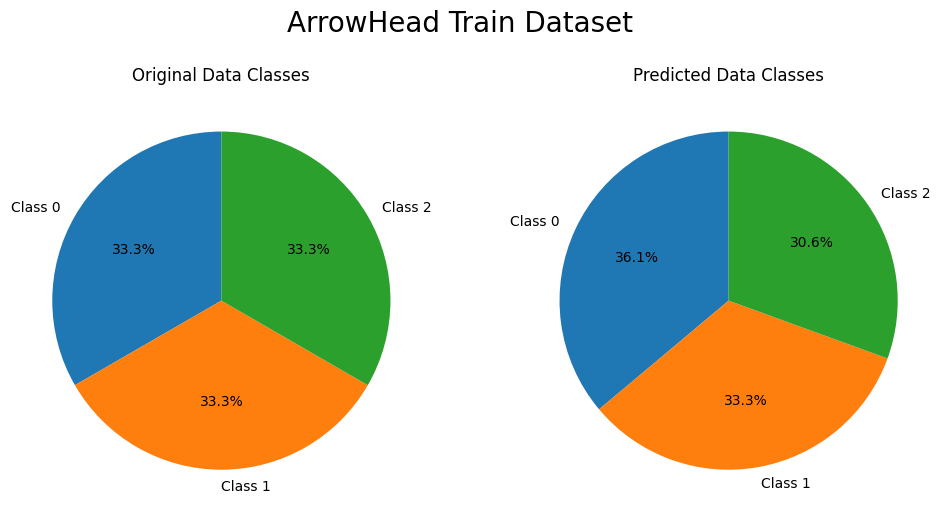

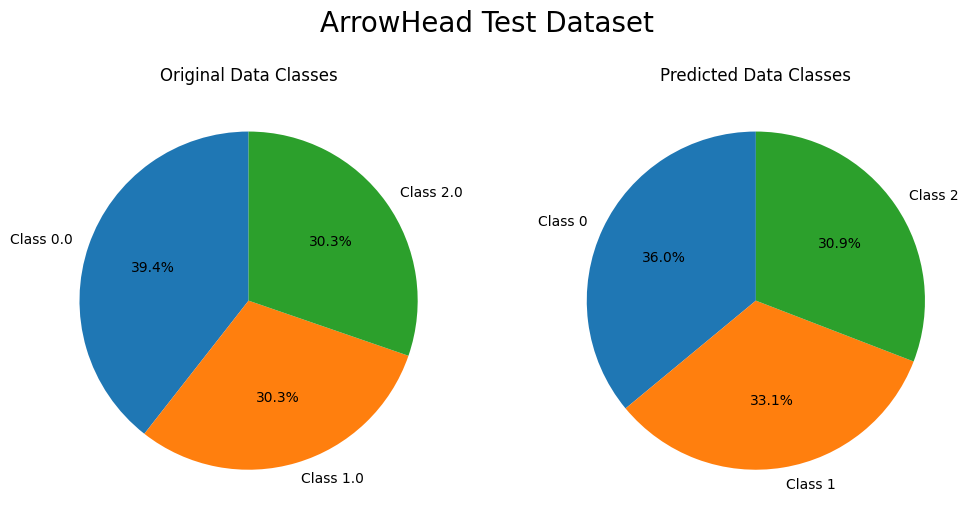

ArrowHead train:  97.22222222222221
ArrowHead test:  74.85714285714286


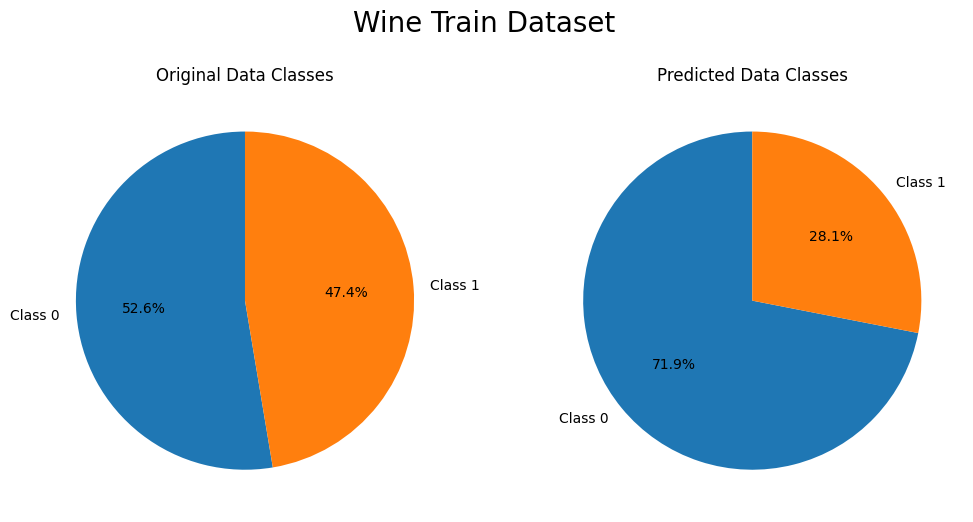

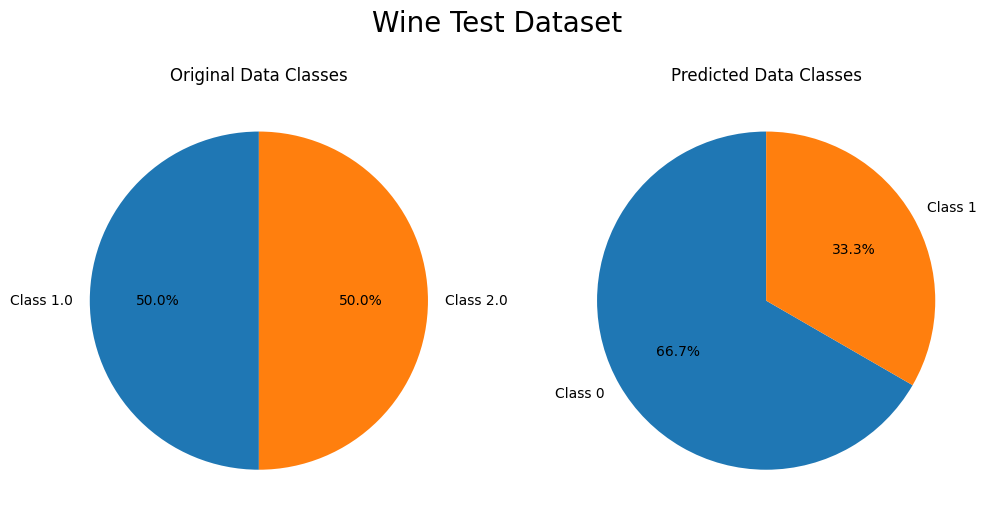

Wine train:  54.385964912280706
Wine test:  61.111111111111114


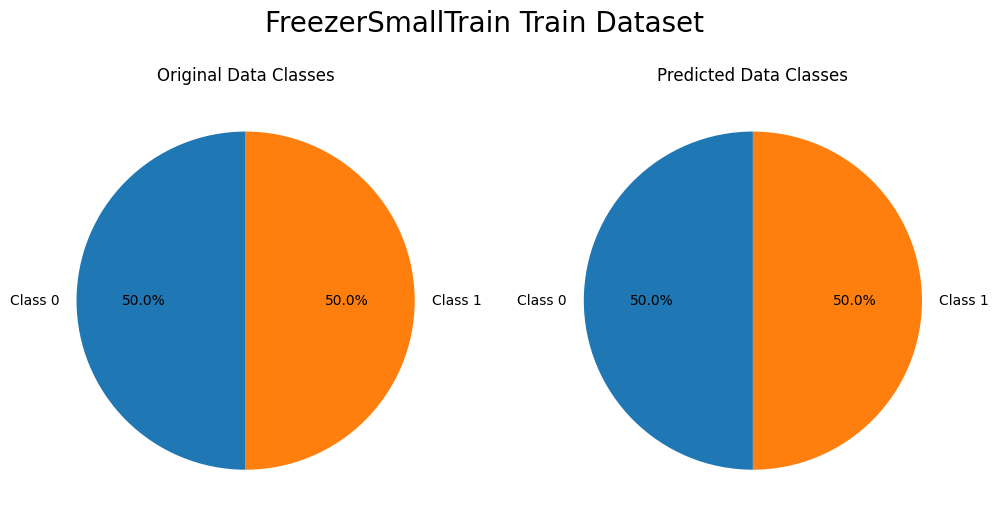

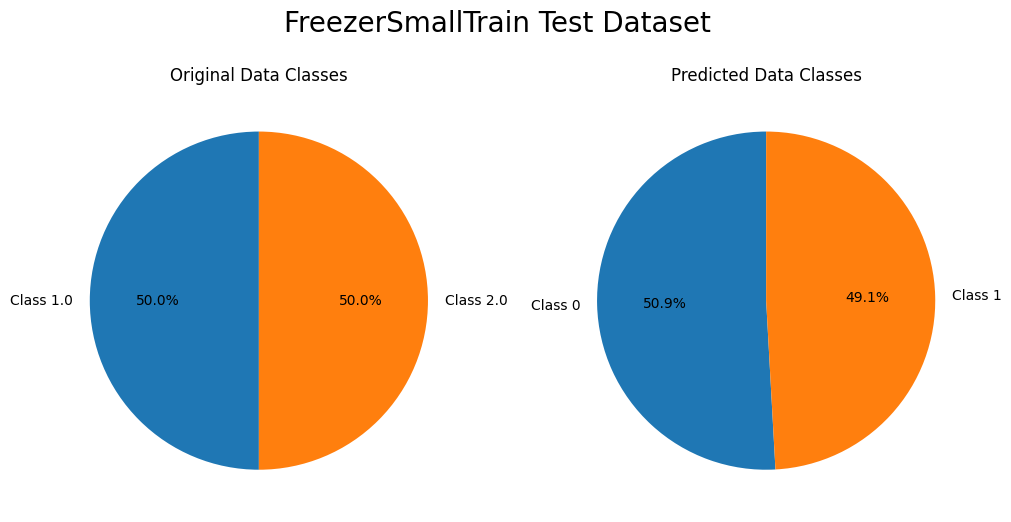

FreezerSmallTrain train:  100.0
FreezerSmallTrain test:  68.94736842105263


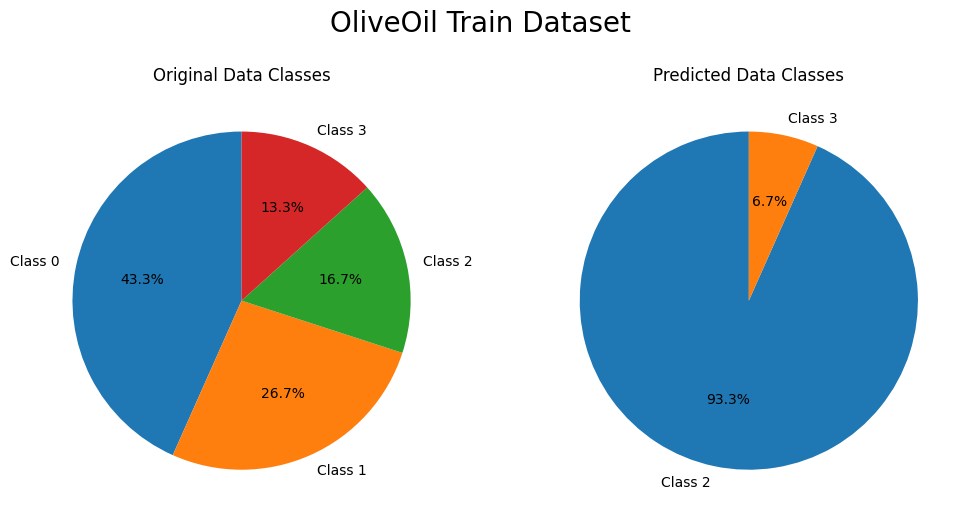

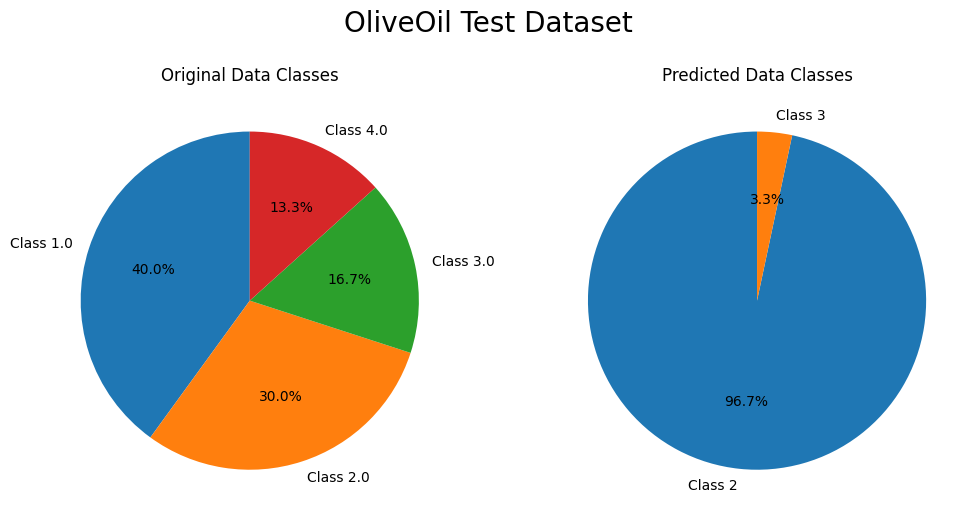

OliveOil train:  50.0
OliveOil test:  43.333333333333336


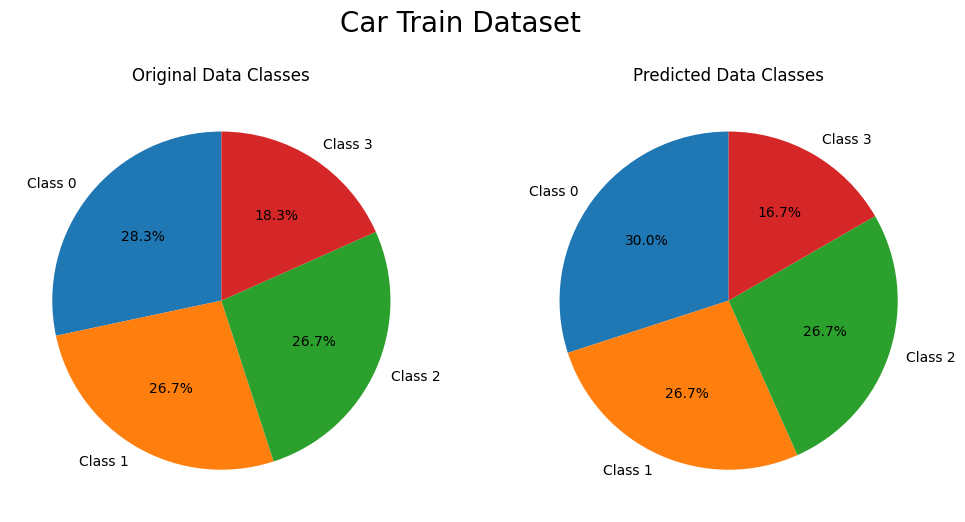

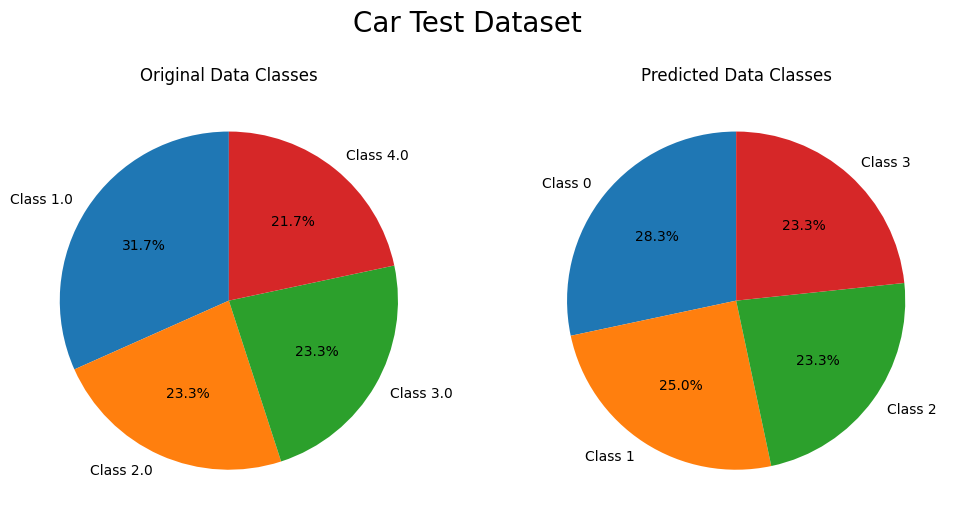

Car train:  98.33333333333333
Car test:  83.33333333333334


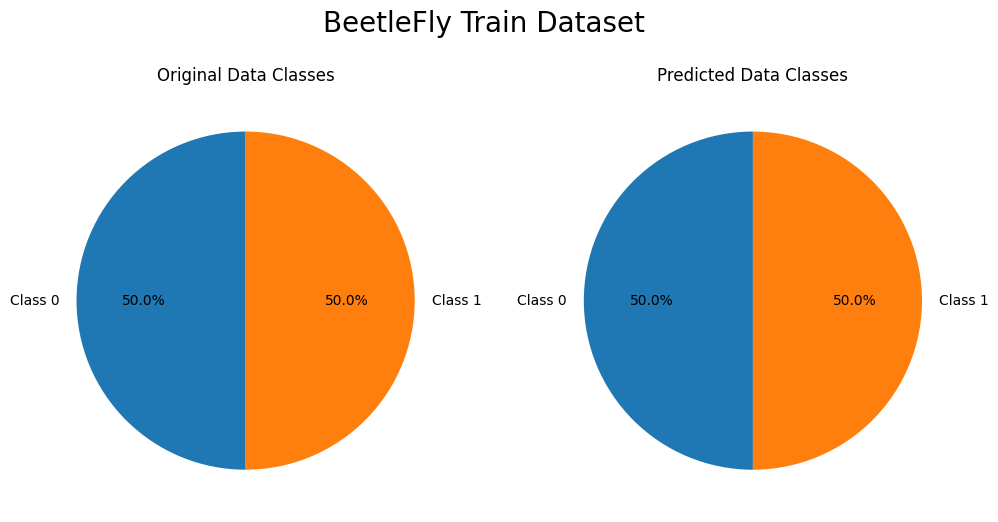

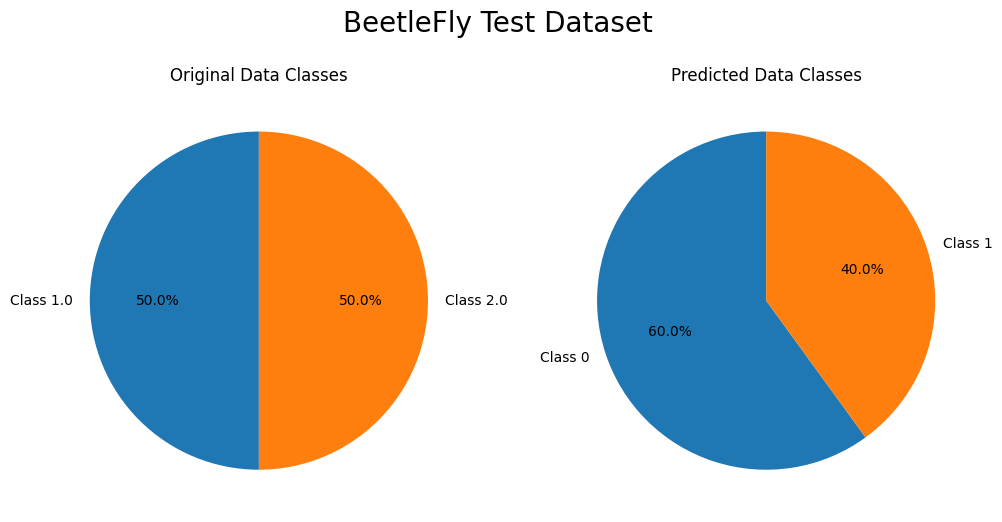

BeetleFly train:  100.0
BeetleFly test:  80.0


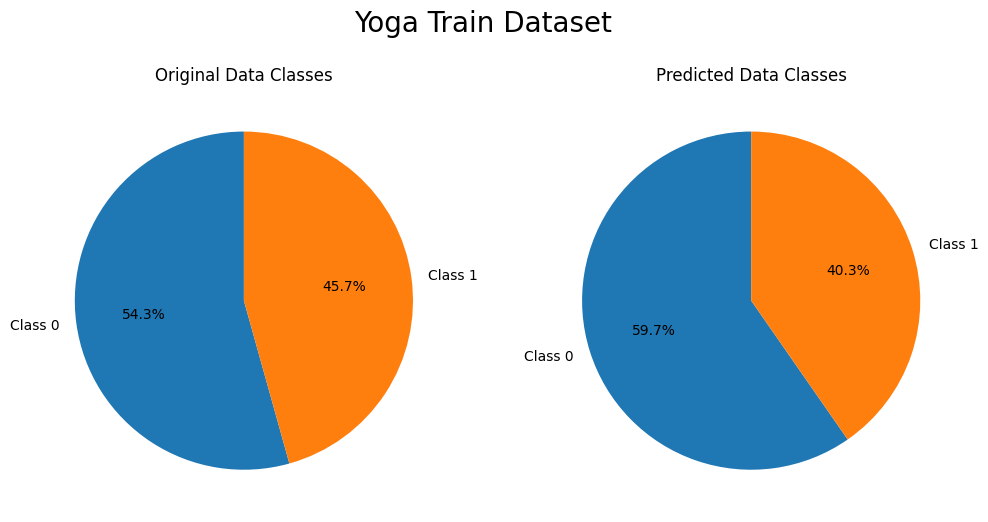

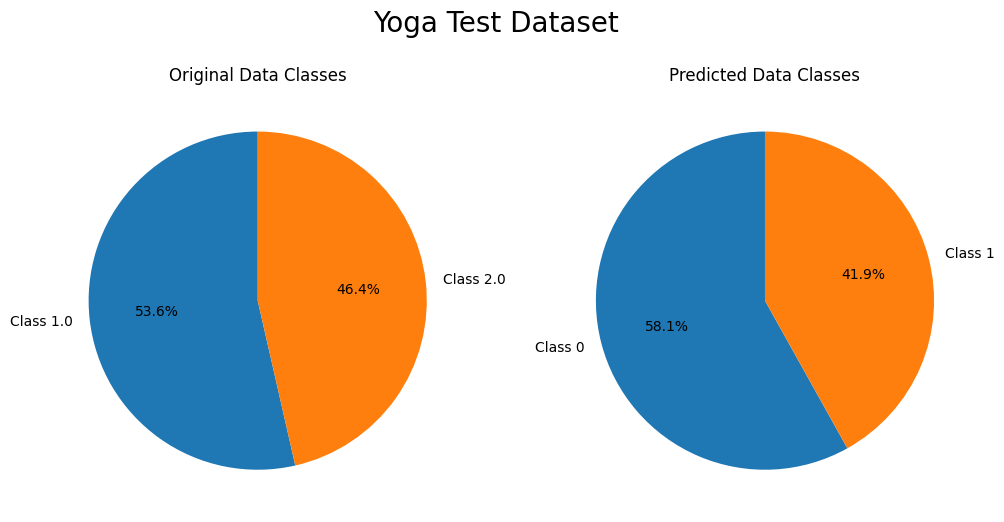

Yoga train:  76.0
Yoga test:  64.0


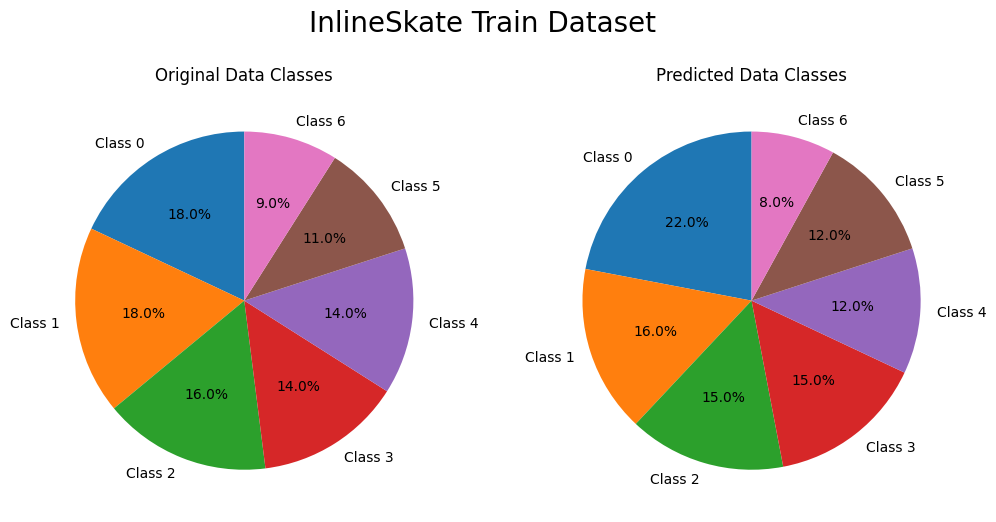

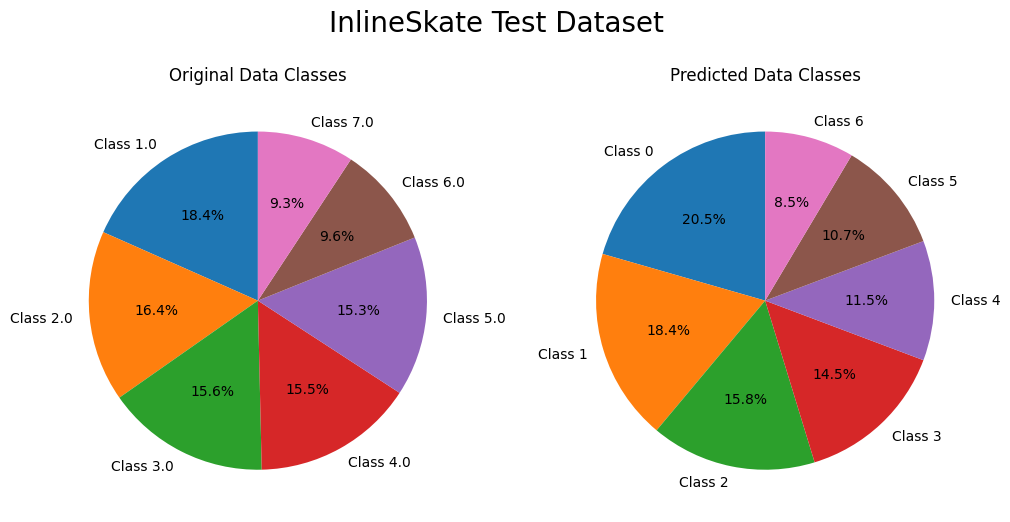

InlineSkate train:  82.0
InlineSkate test:  27.090909090909093


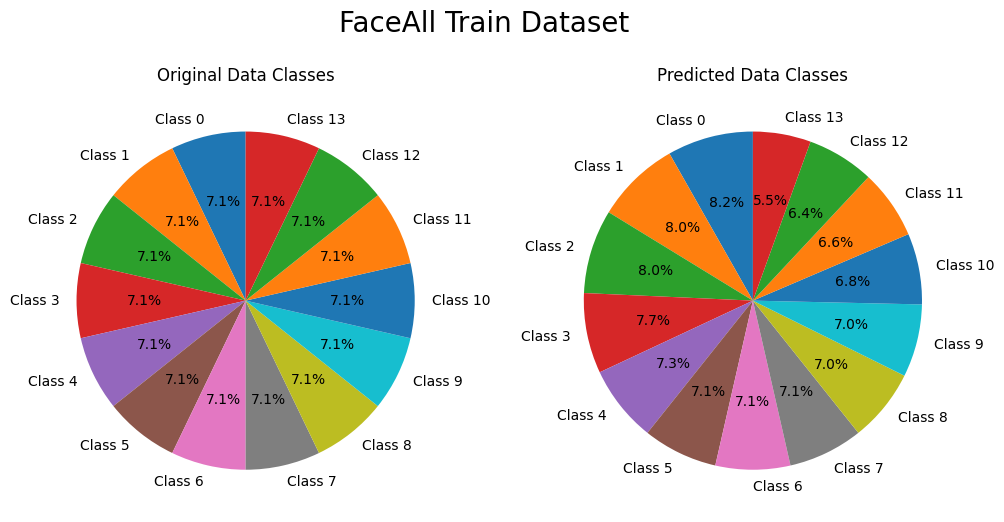

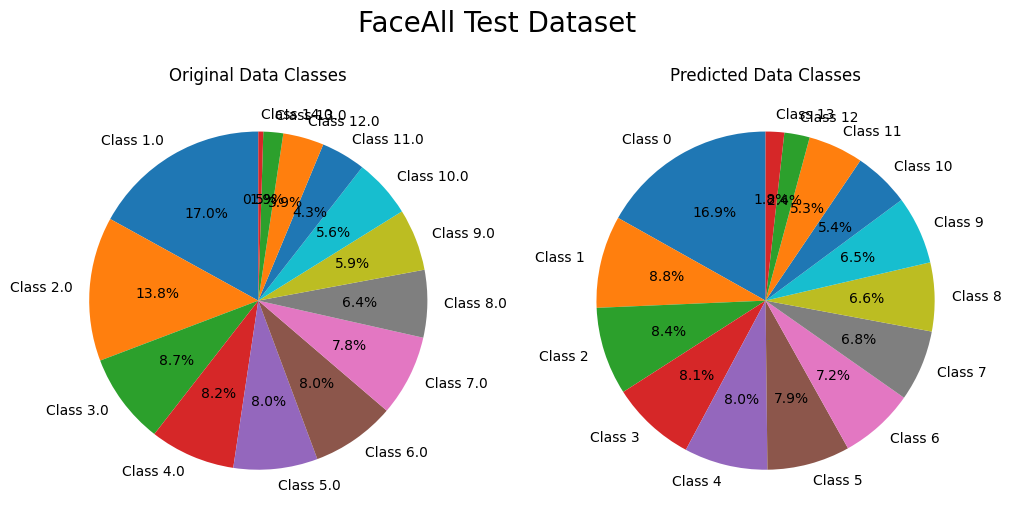

FaceAll train:  91.78571428571428
FaceAll test:  79.05325443786982


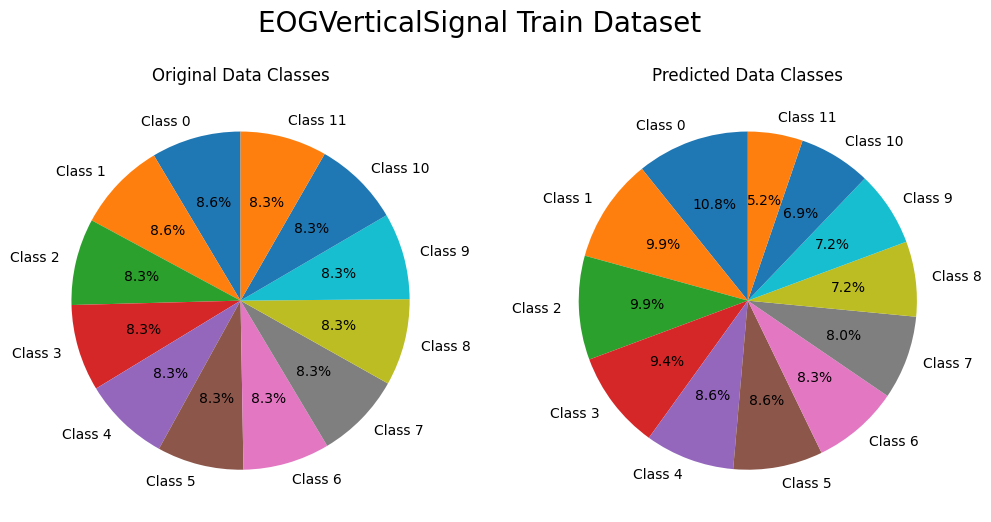

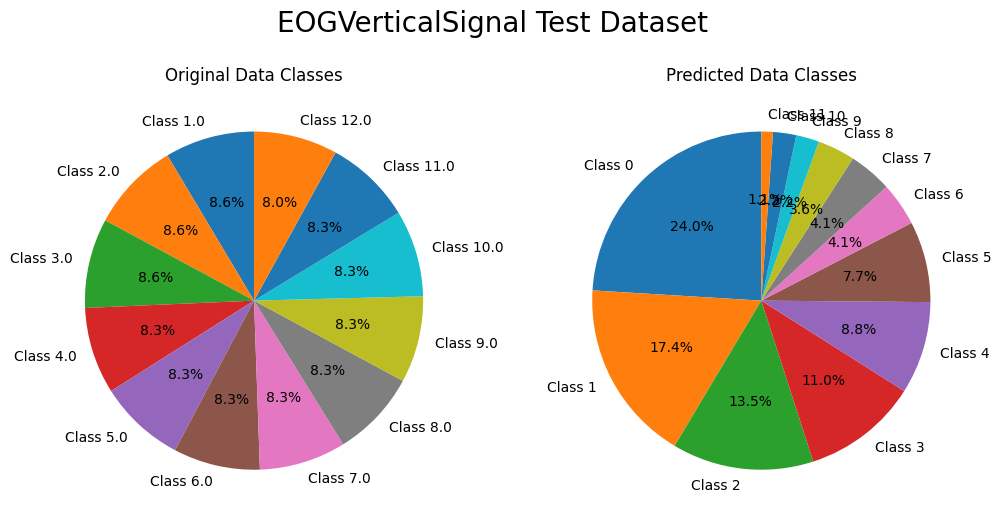

EOGVerticalSignal train:  80.66298342541437
EOGVerticalSignal test:  30.11049723756906


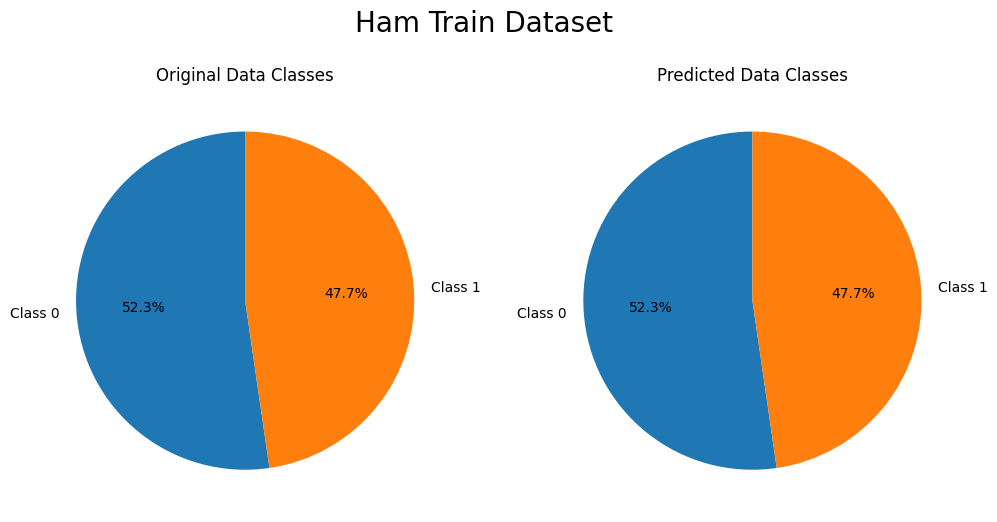

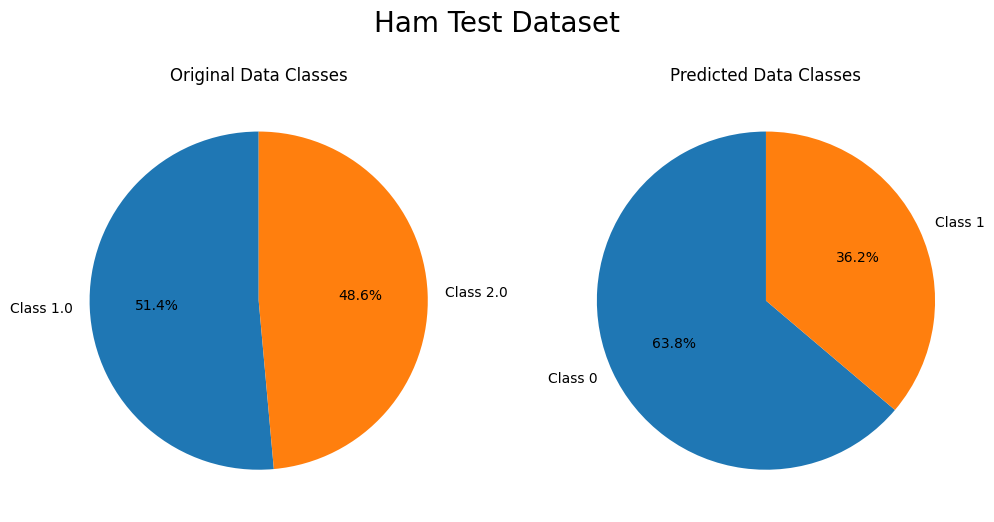

Ham train:  98.1651376146789
Ham test:  66.66666666666666


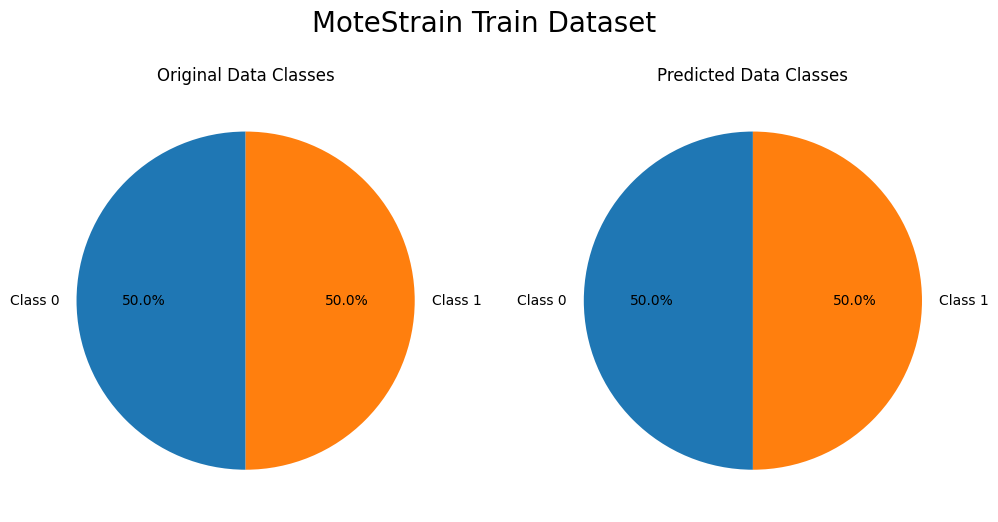

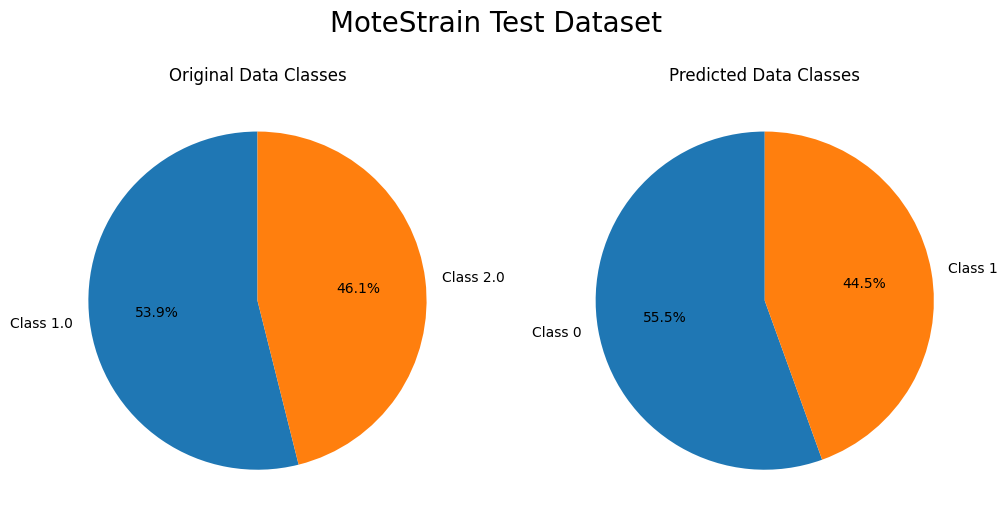

MoteStrain train:  100.0
MoteStrain test:  86.74121405750799


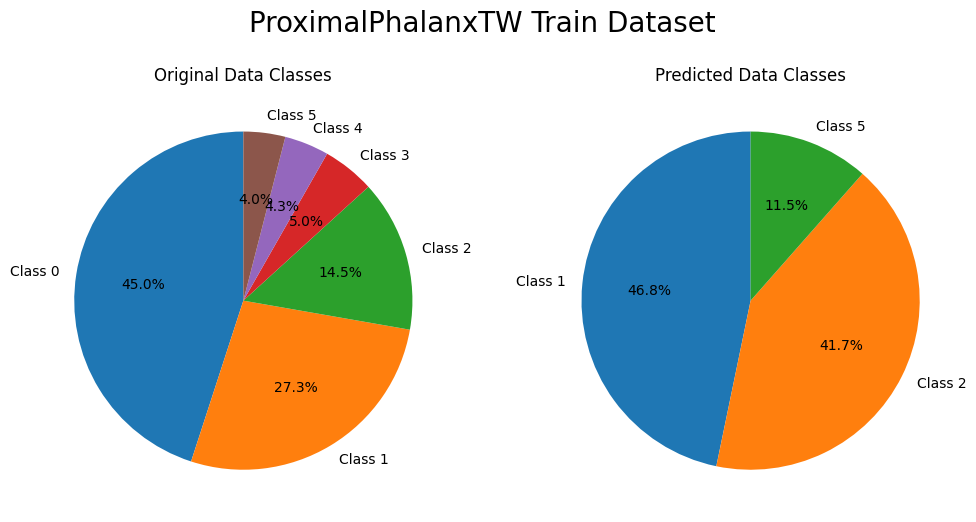

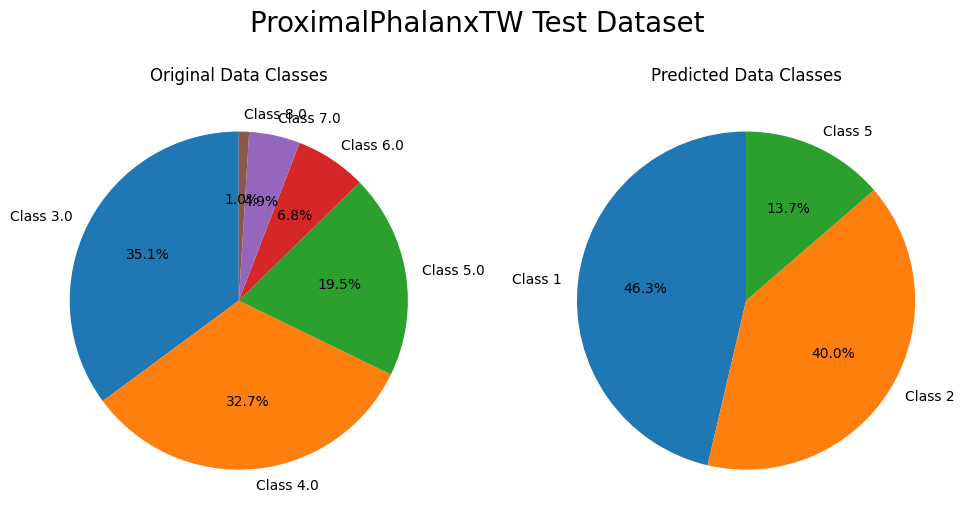

ProximalPhalanxTW train:  77.5
ProximalPhalanxTW test:  74.14634146341463


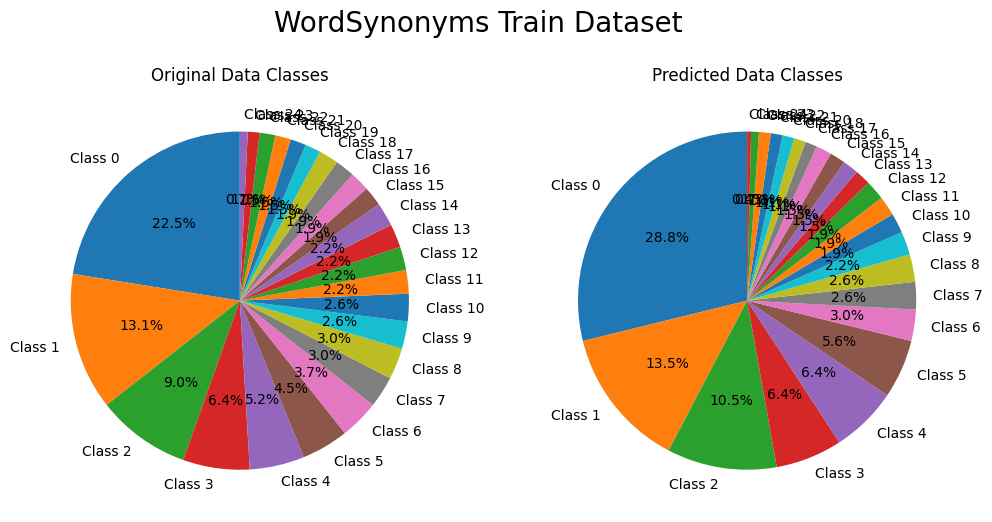

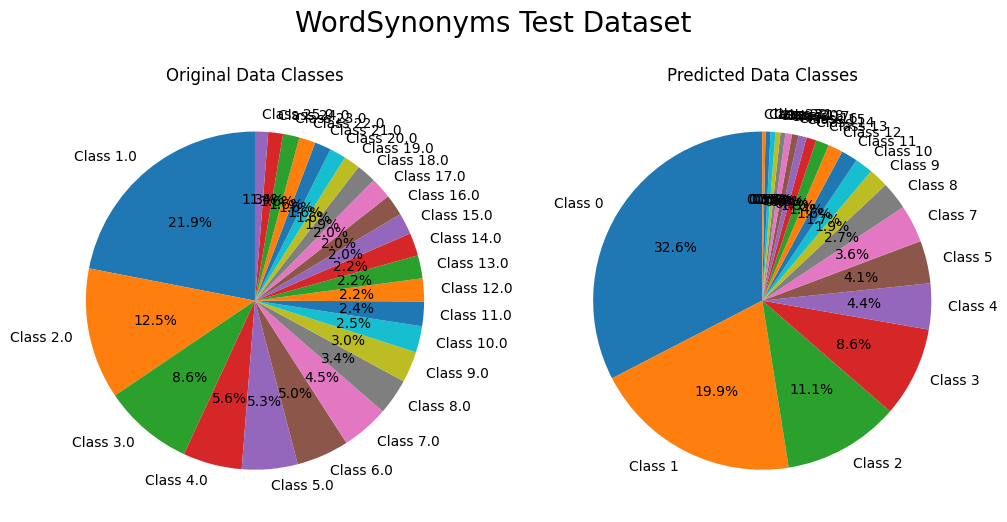

WordSynonyms train:  78.65168539325843
WordSynonyms test:  42.94670846394985


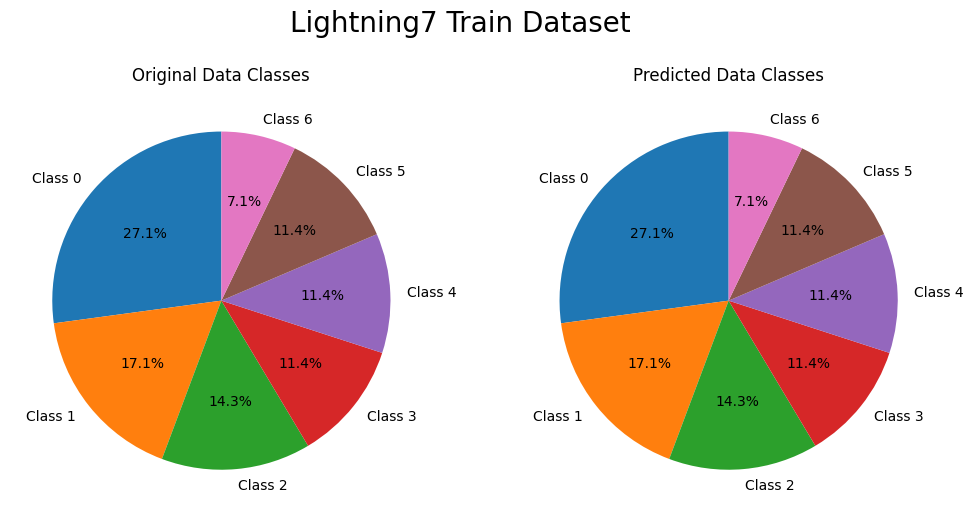

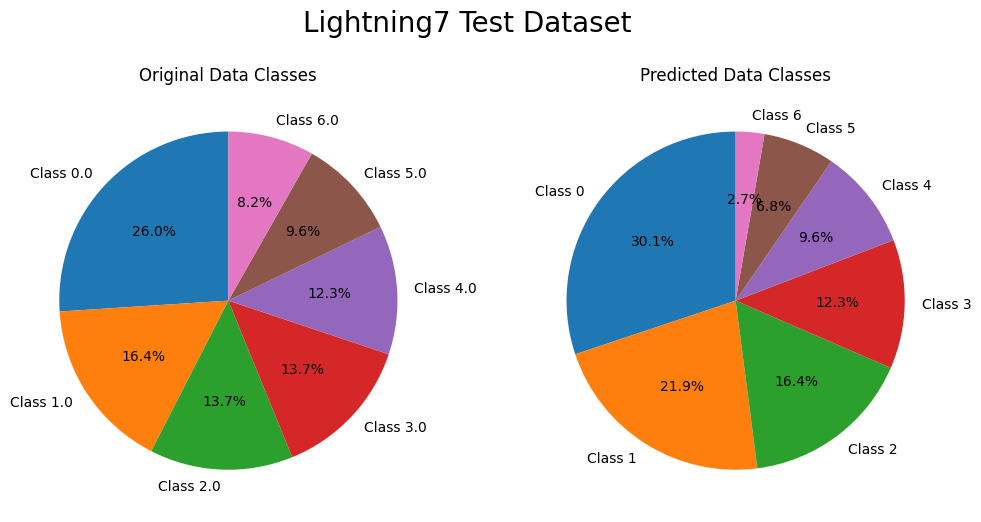

Lightning7 train:  100.0
Lightning7 test:  60.273972602739725


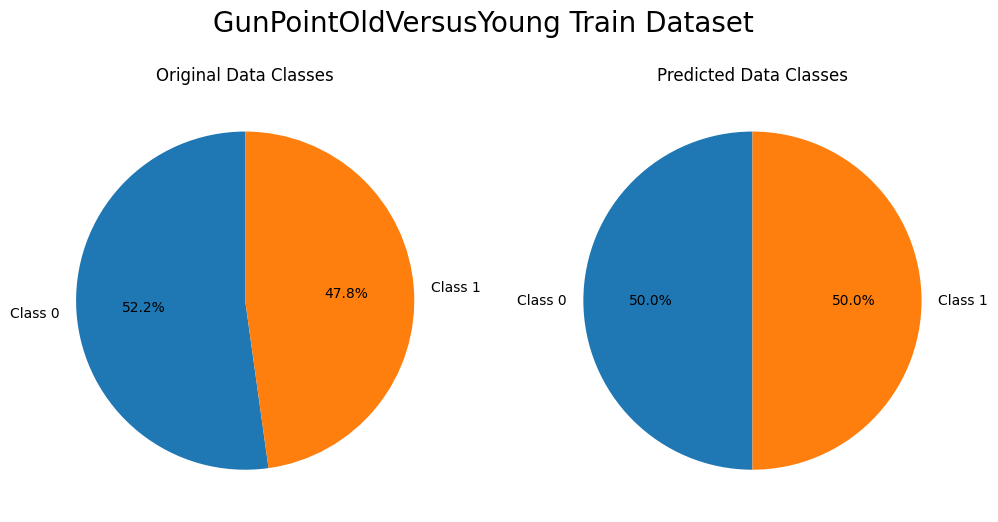

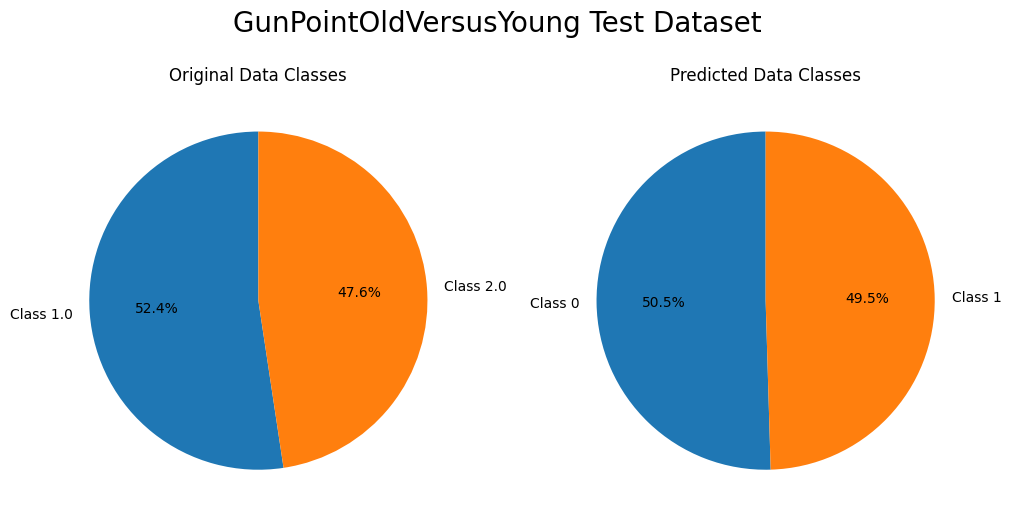

GunPointOldVersusYoung train:  91.91176470588235
GunPointOldVersusYoung test:  86.98412698412699


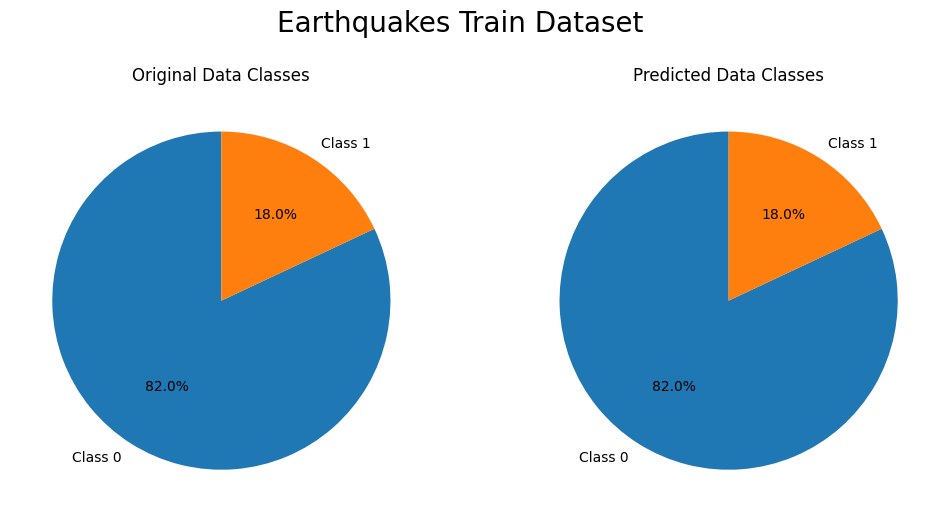

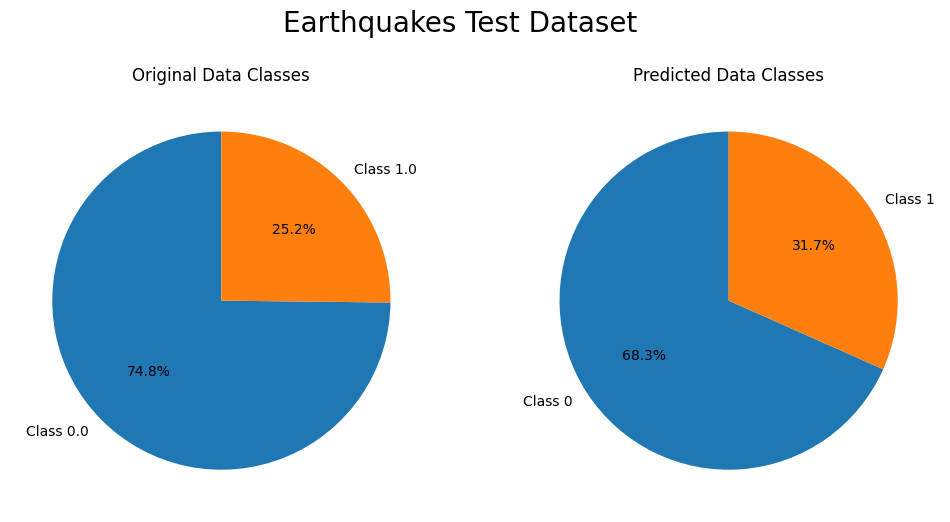

Earthquakes train:  100.0
Earthquakes test:  61.87050359712231


In [9]:
from models import LogisticRegression
# from constants import UNIVARIATE_DATASET_NAMES_2018
from utils import read_dataset,  label_encoder

UNIVARIATE_DATASET_NAMES_2018  = ['ArrowHead', 'Wine', 'FreezerSmallTrain', 'OliveOil', 'Car', 'BeetleFly',  'Yoga', 'InlineSkate', 'FaceAll', 'EOGVerticalSignal',  'Ham', 'MoteStrain','ProximalPhalanxTW',  'WordSynonyms', 'Lightning7', 'GunPointOldVersusYoung',  'Earthquakes' ]
results=[]


for dataset in UNIVARIATE_DATASET_NAMES_2018:
    df = read_dataset(dataset)
    X = df[dataset][0]
    y = label_encoder(df[dataset][1])
    model = LogisticRegression()
    model.fit(X, y)


    y_pred_train = model.predict(X)

    accuracy_train = model.score(y_pred_train, y)

    y_pred_test = model.predict(df[dataset][2])

    accuracy_test = model.score(y_pred_test, label_encoder(df[dataset][3]))

    plot_pie_chart(y, y_pred_train, f"{dataset} Train Dataset")
    plot_pie_chart(df[dataset][3], y_pred_test, f"{dataset} Test Dataset")

    print(f"{dataset} train: ",accuracy_train)
    print(f"{dataset} test: ",accuracy_test)

    results.append([dataset, "%.2f" % accuracy_train, "%.2f" % accuracy_test])



In [10]:
results = pd.DataFrame(results, columns=["Dataset","Train Accuracy", "Test Accuracy"])

In [5]:
results

,Dataset,Train Accuracy,Test Accuracy
0,ArrowHead,97.22,74.86
1,Wine,54.39,61.11
2,FreezerSmallTrain,100.00,68.95
3,OliveOil,50.00,43.33
4,Car,98.33,83.33
5,BeetleFly,100.00,80.00
6,Yoga,76.00,64.00
7,InlineSkate,82.00,27.09
8,FaceAll,91.79,79.05
9,EOGVerticalSignal,80.66,30.11


In [27]:
results

,Dataset,Train Accuracy,Test Accuracy
0,ArrowHead,91.67,72.57
1,Wine,57.89,50.00
2,FreezerSmallTrain,100.00,69.23
3,OliveOil,43.33,40.00
4,Car,95.00,80.00
5,BeetleFly,100.00,80.00
6,Yoga,68.33,62.53
7,InlineSkate,71.00,26.91
8,FaceAll,84.46,75.27
9,EOGVerticalSignal,72.65,30.66


In [24]:
results.to_csv('results.csv', index=False)  